In [49]:
!python --version

Python 3.12.12


# Import Dataset

In [50]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
forest_fires = fetch_ucirepo(id=162)

# data (as pandas dataframes)
X = forest_fires.data.features
y = forest_fires.data.targets

# metadata
print(forest_fires.metadata)

# variable information
print(forest_fires.variables)

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [6]:
import pandas as pd

# menggabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([X, y], axis=1)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Cek Kondisi Data

In [8]:
# Cek Duplikat
print(f"Duplicates: {df.duplicated().sum()}")

# Cek Distribusi Target (Area = 0)
zeros = (df['area'] == 0).sum()
print(f"Zero Area: {zeros} rows ({zeros/len(df):.2%})")

# Cek Skewness (kemiringan) Target
print(f"Skewness: {df['area'].skew():.2f}")

Duplicates: 4
Zero Area: 247 rows (47.78%)
Skewness: 12.85


# Exploratory Data Analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom Log Area untuk visualisasi perbandingan
df['area_log'] = np.log1p(df['area'])

# Set style visualisasi
sns.set(style="whitegrid")

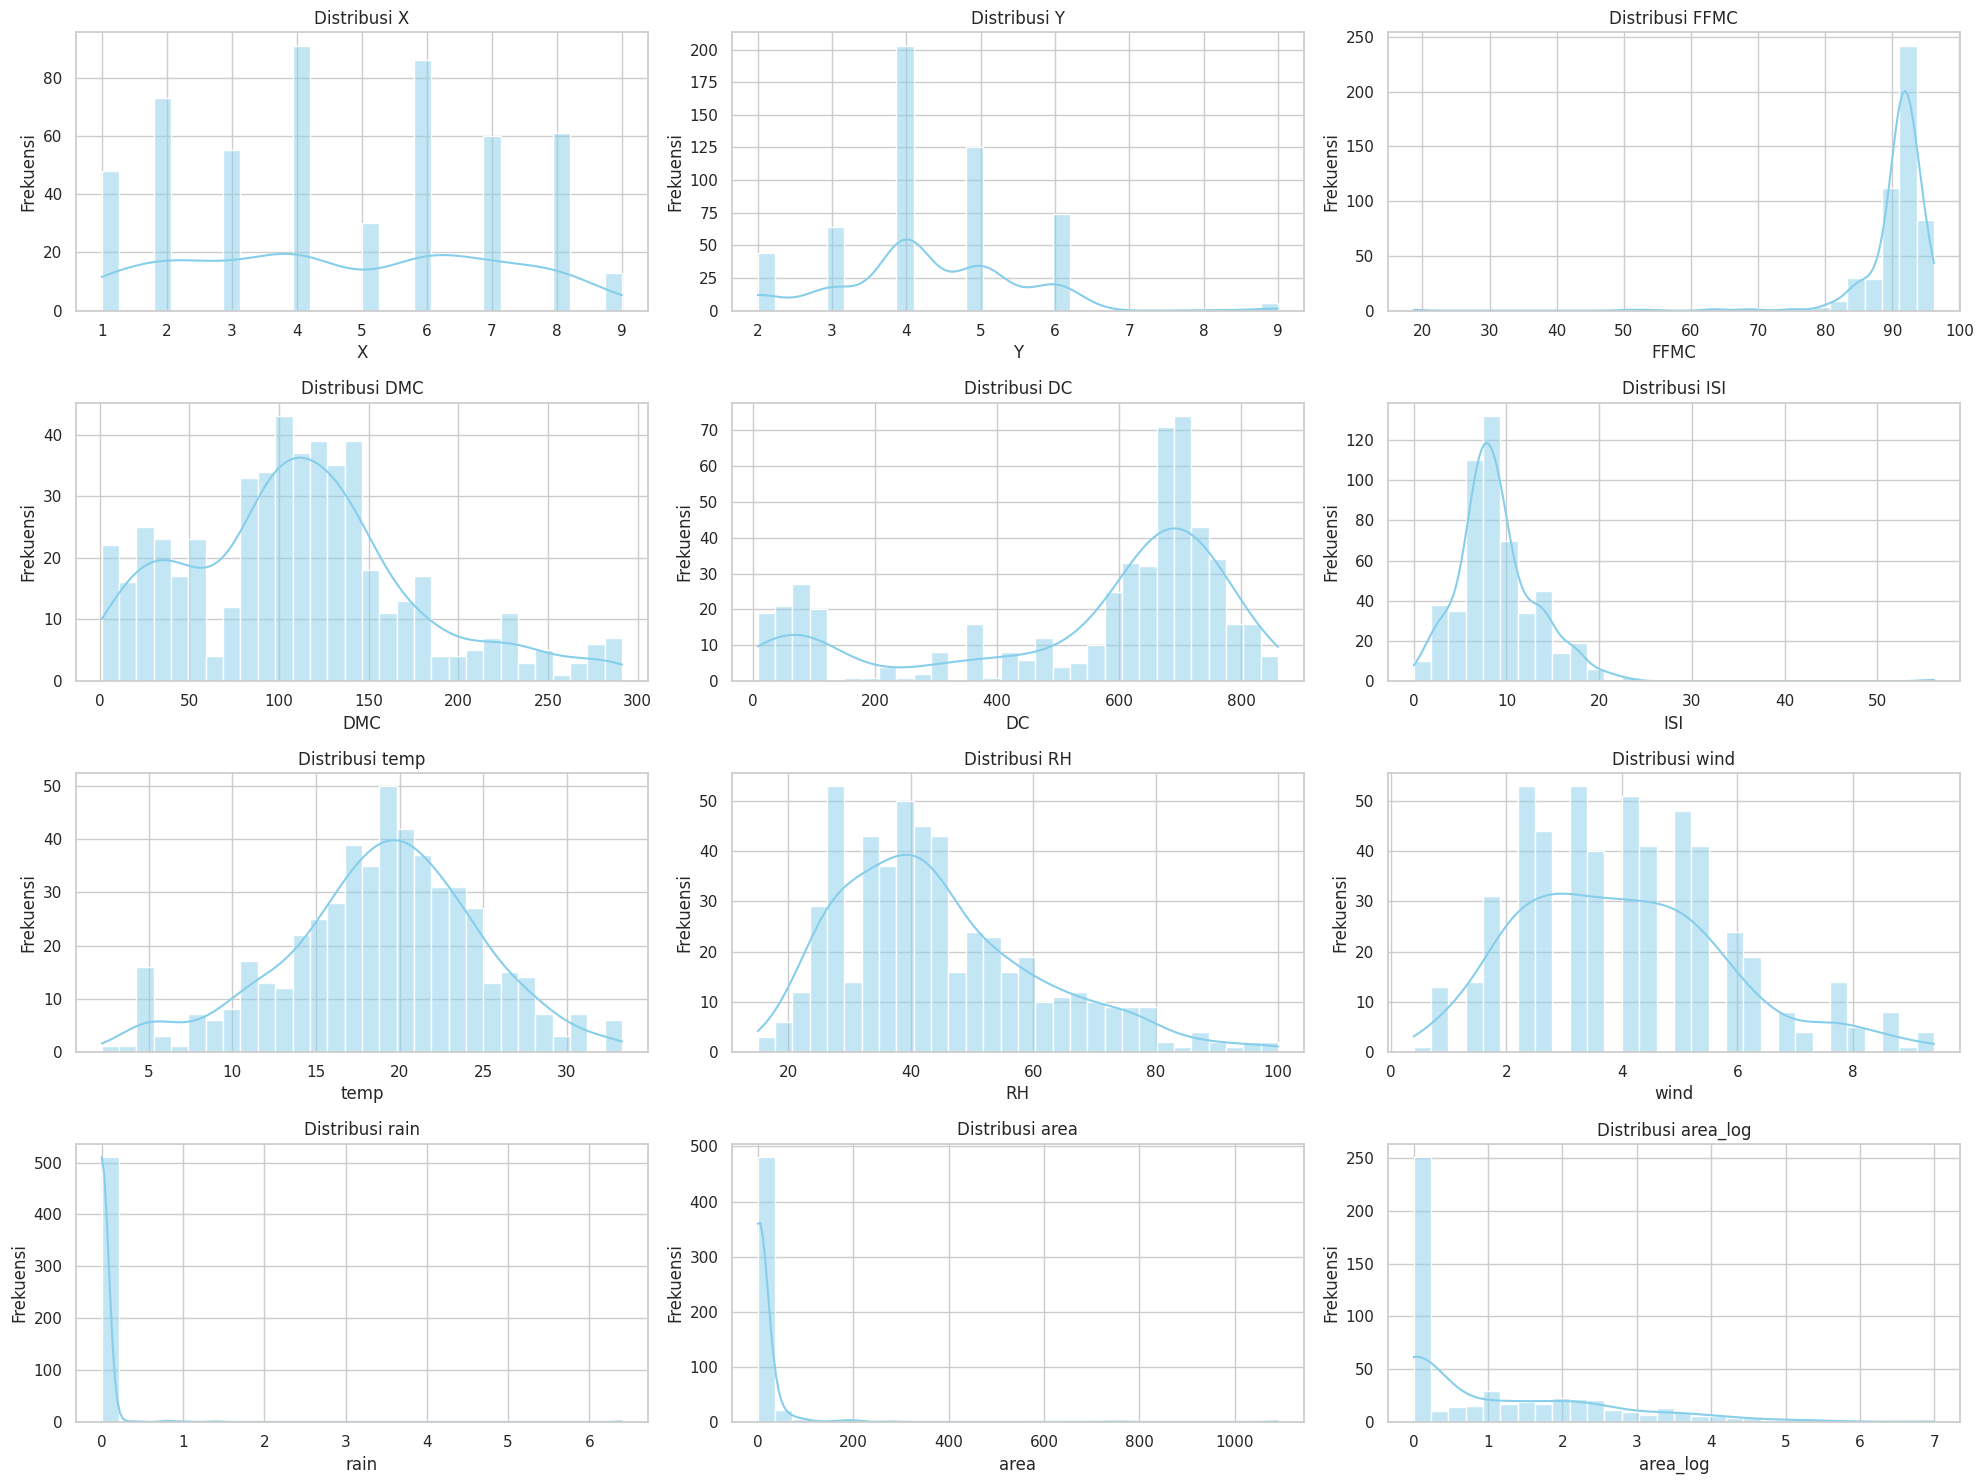

In [10]:
#@title Histogram Fitur
# Pilih kolom numerik
numerical_cols = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'area_log']

# Set ukuran canvas gambar (lebih besar karena banyak plot)
plt.figure(figsize=(20, 15))

# Looping untuk membuat subplot setiap fitur
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

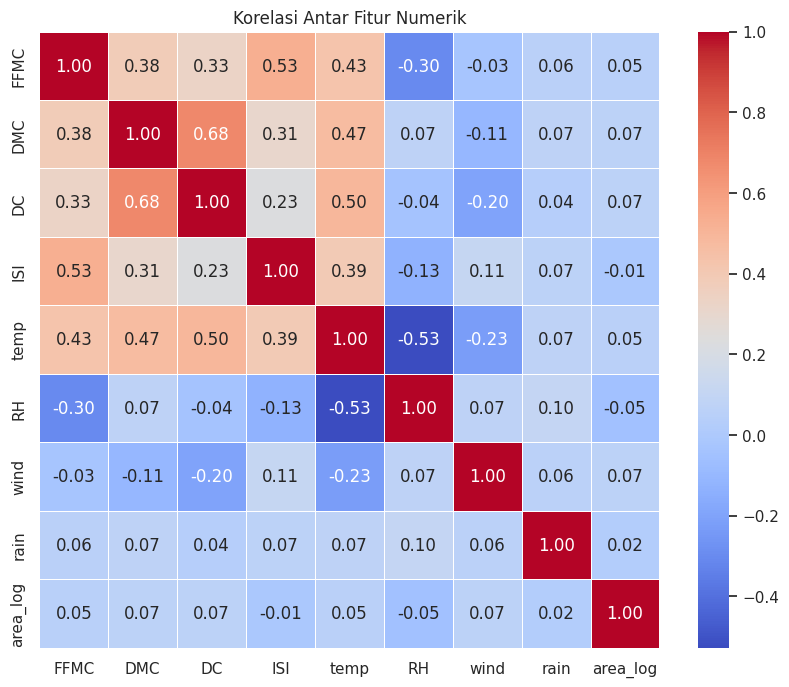

In [11]:
#@title Heatmap Korelasi Fitur
plt.figure(figsize=(10, 8))
# Pilih kolom numerik penting
cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area_log']
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

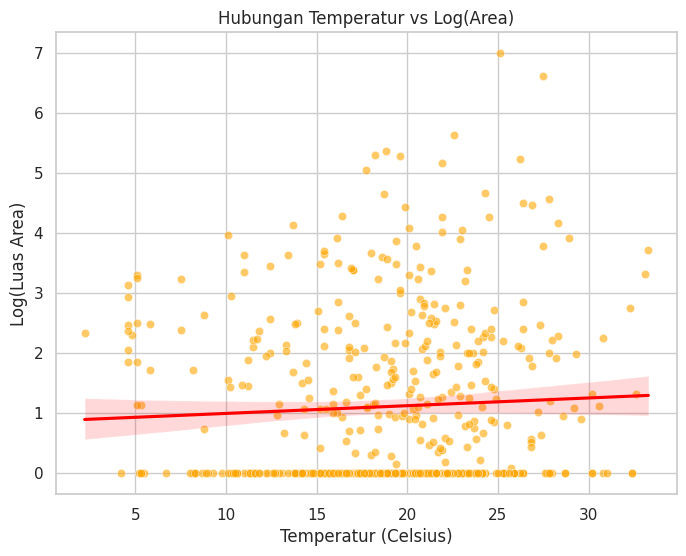

In [12]:
#@title Scatter Plot Scatter Plot Temperatur vs Log(Area)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='area_log', data=df, alpha=0.6, color='orange')
# Tambahkan garis regresi sederhana
sns.regplot(x='temp', y='area_log', data=df, scatter=False, color='red')

plt.title('Hubungan Temperatur vs Log(Area)')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Log(Luas Area)')
plt.show()

# Data Cleaning

In [13]:
# Removing Duplicates
print(f"Shape sebelum drop: {df.shape}")
df = df.drop_duplicates().copy()
print(f"Removing Duplicates: Selesai. Shape baru: {df.shape}")

Shape sebelum drop: (517, 14)
Removing Duplicates: Selesai. Shape baru: (513, 14)


In [14]:
# Handling Outliers
df['area_log'] = np.log1p(df['area'])
print("Handling Outliers: Transformasi Log pada 'area' berhasil.")

Handling Outliers: Transformasi Log pada 'area' berhasil.


In [15]:
# Data Type Conversion
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].map(month_map)
df['day'] = df['day'].map(day_map)

print("Data Type Conversion: Kolom 'month' dan 'day' sudah menjadi angka.")

# Cek hasil akhir tipe data
print("\nInfo Data Terbaru:")
print(df.info())

Data Type Conversion: Kolom 'month' dan 'day' sudah menjadi angka.

Info Data Terbaru:
<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 516
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         513 non-null    int64  
 1   Y         513 non-null    int64  
 2   month     513 non-null    int64  
 3   day       513 non-null    int64  
 4   FFMC      513 non-null    float64
 5   DMC       513 non-null    float64
 6   DC        513 non-null    float64
 7   ISI       513 non-null    float64
 8   temp      513 non-null    float64
 9   RH        513 non-null    int64  
 10  wind      513 non-null    float64
 11  rain      513 non-null    float64
 12  area      513 non-null    float64
 13  area_log  513 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 60.1 KB
None


In [16]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


# Feature Engineering

In [17]:
# Creating new features
df['is_weekend'] = df['day'].apply(lambda x: 1 if x >= 6 else 0)
print("Feature Creation: Fitur 'is_weekend' berhasil dibuat.")

Feature Creation: Fitur 'is_weekend' berhasil dibuat.


In [18]:
# Feature Selection
feature_cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'is_weekend']

X = df[feature_cols]       # Fitur Prediktor
y = df['area_log']         # Target (Log Transformed)

print(f"Feature Selection: Terpilih {len(feature_cols)} fitur.")

Feature Selection: Terpilih 13 fitur.


In [19]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log,is_weekend
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000,1
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2.006871,1
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,4.012592,1
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2.498152,1
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,1


# Data Transformation

In [20]:
from sklearn.preprocessing import StandardScaler

# 1. Encoding (Sudah dilakukan di tahap cleaning, tapi pada tahap ini hanya untuk validasi)
print("Cek Encoding Month/Day:", df[['month', 'day']].dtypes)

Cek Encoding Month/Day: month    int64
day      int64
dtype: object


In [21]:
# Scaling (Standardization)
scaler = StandardScaler()

# Fit & Transform hanya pada fitur X (tidak termasuk target)
X_scaled_values = scaler.fit_transform(X)

# Ubah kembali ke DataFrame agar nama kolom tidak hilang
X_scaled = pd.DataFrame(X_scaled_values, columns=feature_cols)

print("Status Scaling: Berhasil. Mean hampir 0, Std = 1.")
print(X_scaled.describe().round(2).loc[['mean', 'std']])

Status Scaling: Berhasil. Mean hampir 0, Std = 1.
        X    Y  month  day  FFMC  DMC   DC  ISI  temp   RH  wind  rain  \
mean  0.0  0.0    0.0 -0.0  -0.0  0.0  0.0  0.0   0.0 -0.0  -0.0   0.0   
std   1.0  1.0    1.0  1.0   1.0  1.0  1.0  1.0   1.0  1.0   1.0   1.0   

      is_weekend  
mean         0.0  
std          1.0  


In [23]:
print(X_scaled.head())

          X         Y     month       day      FFMC       DMC        DC  \
0  1.001657  0.569075 -1.973438  0.361087 -0.801628 -1.322179 -1.837925   
1  1.001657 -0.244116  1.106360 -1.086081 -0.006761 -1.178717  0.484659   
2  1.001657 -0.244116  1.106360  0.843476 -0.006761 -1.049290  0.556583   
3  1.433101  1.382265 -1.973438  0.361087  0.191956 -1.211464 -1.905808   
4  1.433101  1.382265 -1.973438  1.325865 -0.241608 -0.930777 -1.806003   

        ISI      temp        RH      wind      rain  is_weekend  
0 -0.858350 -1.835573  0.406971  1.498430 -0.073555    -0.72580  
1 -0.508323 -0.152432 -0.694428 -1.733018 -0.073555    -0.72580  
2 -0.508323 -0.736379 -0.694428 -1.510159 -0.073555     1.37779  
3 -0.005160 -1.818399  3.221658 -0.005865  0.600261    -0.72580  
4  0.126100 -1.285976  3.344035 -1.231586 -0.073555     1.37779  


# Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

# split data 80% Train dan 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# Print hasil shape untuk verifikasi
print(f"Total Data: {len(X_scaled)}")
print(f"Train Set : {X_train.shape[0]} samples (80%)")
print(f"Test Set  : {X_test.shape[0]} samples (20%)")

Total Data: 513
Train Set : 410 samples (80%)
Test Set  : 103 samples (20%)


# Model Baseline: Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inisialisasi Model
model_baseline = LinearRegression(fit_intercept=True,
                                  copy_X=True,
                                  n_jobs=None)

# Training Model
model_baseline.fit(X_train, y_train)

# Prediksi pada Data Test
y_pred_baseline = model_baseline.predict(X_test)

# Evaluasi Awal
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae_lr = mean_absolute_error(y_test, y_pred_baseline)

print("Hasil Awal Linear Regression")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")

# Cek prediksi vs aktual (5 data pertama)
print("\nContoh Prediksi (Log Scale):")
compare = pd.DataFrame({'Actual': y_test[:5].values, 'Pred': y_pred_baseline[:5]})
print(compare)

Hasil Awal Linear Regression
RMSE: 1.2562
MAE : 1.0774

Contoh Prediksi (Log Scale):
     Actual      Pred
0  0.000000  0.766213
1  0.000000  1.435084
2  0.000000  0.937616
3  0.940007  0.807813
4  0.000000  1.216610


# Model ML / Advanced Model: Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi Model
model_advanced = RandomForestRegressor(n_estimators=100,
                                 random_state=42,
                                 bootstrap=True,
                                 criterion='squared_error')

# Training Model
model_advanced.fit(X_train, y_train)

# Prediksi pada Data Test
y_pred_advanced = model_advanced.predict(X_test)

# Evaluasi Awal
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_advanced))
mae_rf = mean_absolute_error(y_test, y_pred_advanced)

print("Hasil Awal Random Forest (Log Scale)")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")

# Bandingkan dengan Baseline
print(f"\nSelisih RMSE dengan Baseline: {rmse_rf - rmse_lr:.4f}")

Hasil Awal Random Forest (Log Scale)
RMSE: 1.3500
MAE : 1.1573

Selisih RMSE dengan Baseline: 0.0938


# Model Deep Learning: MLP

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6571 - mae: 1.2660 - val_loss: 2.1702 - val_mae: 1.1288 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4494 - mae: 1.2412 - val_loss: 2.1217 - val_mae: 1.1361 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1421 - mae: 1.1736 - val_loss: 2.0979 - val_mae: 1.1419 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4137 - mae: 1.2696 - val_loss: 2.0569 - val_mae: 1.1365 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2379 - mae: 1.2073 - val_loss: 2.0015 - val_mae: 1.1240 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2979 - mae: 1.2146 - val_loss: 1.9538 - val_mae: 1.1083 - learning_rate: 0.0010
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1817 - mae: 1.1852 - val_loss: 1.9313 - val_mae: 1.0991 - learning_rate: 0.0010
Epoch 8/100

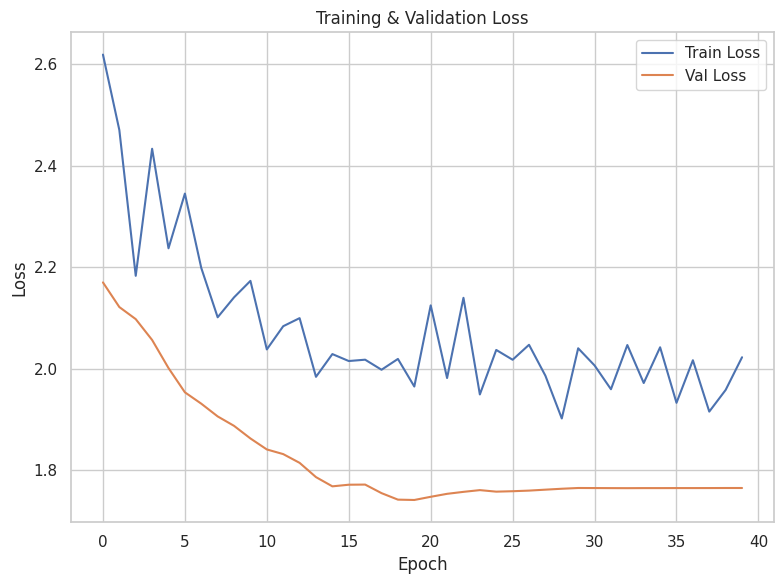

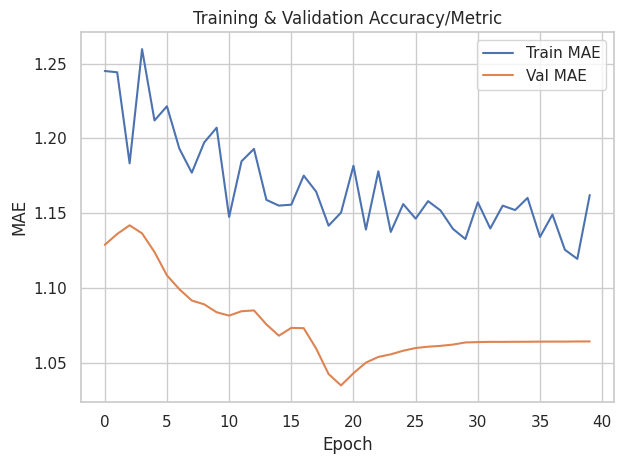

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import time

# Set seed untuk reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Definisi Arsitektur
input_dim = X_train.shape[1]

model_dl = Sequential([
    # Hidden Layer 1: Cukup besar untuk menangkap pola
    Input(shape=(13,)),
    Dense(64, activation='relu'),
    Dropout(0.3), # Mematikan 30% neuron secara acak (mencegah overfitting)

    # Hidden Layer 2: Lebih kecil
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Output Layer: 1 Neuron (karena Regresi) & Linear Activation (default)
    Dense(1)
])

# Compile Model
model_dl.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error', # Loss untuk regresi
    metrics=['mae']            # Metric pembanding
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Training Process
start_time = time.time()

history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2, # 20% dari Train dipakai untuk Validasi internal
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

# Visualisasi History
plt.figure(figsize=(8, 6))

# Plot Loss (MSE)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('/content/training_loss.png')
plt.show()
plt.close()

# Plot Metric (MAE)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Training & Validation Accuracy/Metric')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('/content/training_mae.png')
plt.show()
plt.close()

# Model Summary
model_dl.summary()

In [110]:
import pickle
import joblib

# Simpan Model Scikit-Learn
# Simpan Linear Regression
with open('/content/model_baseline.pkl', 'wb') as f:
    pickle.dump(model_baseline, f)

# Simpan Random Forest
with open('/content/model_rf.pkl', 'wb') as f:
    pickle.dump(model_advanced, f)

print("Model Baseline & Advanced berhasil disimpan")

# Simpan Model Deep Learning
# Keras mendeteksi format dari ekstensi file
model_dl.save('/content/model_mlp.h5')
print("Model Deep Learning berhasil disimpan")

# Simpan Scaler
# Scaler juga bisa disimpan .pkl agar seragam
with open('/content/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler berhasil disimpan")

Model Baseline & Advanced berhasil disimpan
Model Deep Learning berhasil disimpan
Scaler berhasil disimpan


# Evaluation

Hasil Model Baseline (Linear Regression)
RMSE: 1.2562
MAE : 1.0774


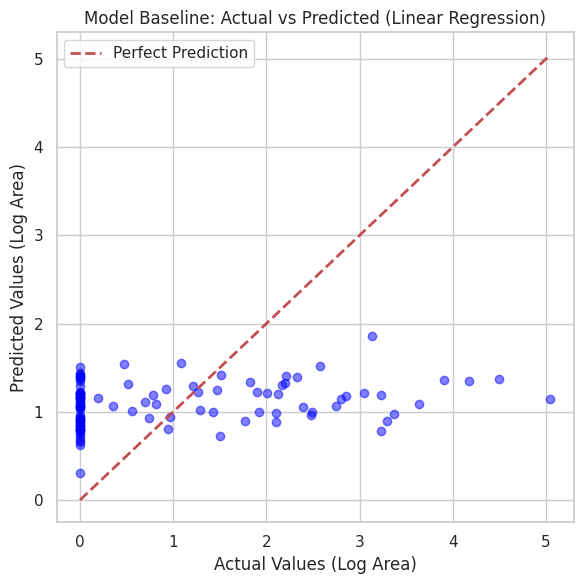

In [51]:
#@title Evaluasi Model Baseline

y_pred_lr = model_baseline.predict(X_test)

# Hitung Metrik
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Hasil Model Baseline (Linear Regression)")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")

# Buat Visualisasi (Actual vs Predicted)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')

# Buat garis diagonal (Perfect Prediction)
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title('Model Baseline: Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values (Log Area)')
plt.ylabel('Predicted Values (Log Area)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Simpan gambar
plt.savefig('/content/result_model1.png')
plt.show()

Hasil Model 2 (Random Forest)
RMSE: 1.3500
MAE : 1.1573


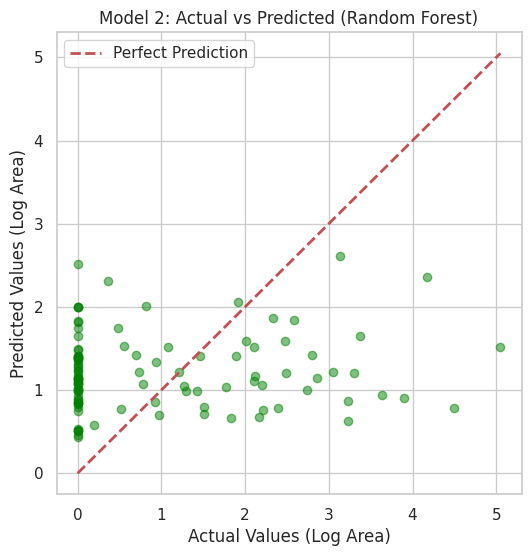

/tmp/ipython-input-4235407620.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')


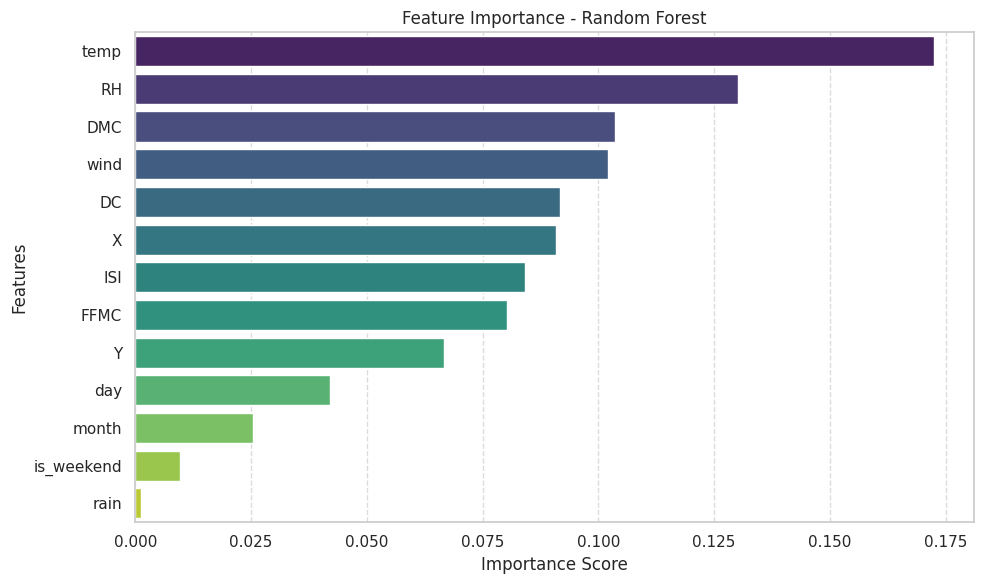


Top 3 Fitur Paling Berpengaruh:
  Feature  Importance
8    temp    0.172486
9      RH    0.130229
5     DMC    0.103664


In [33]:
#@title Evaluasi Model Advanced
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Hitung Metrik Evaluasi
y_pred_rf = model_advanced.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Hasil Model 2 (Random Forest)")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")

# Visualisasi A: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction')
plt.title('Model 2: Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values (Log Area)')
plt.ylabel('Predicted Values (Log Area)')
plt.legend()
plt.grid(True)
plt.savefig('/content/result_model2.png')
plt.show()

# Visualisasi B: Feature Importance (Kekuatan Random Forest)
feature_names = X_train.columns
importances = model_advanced.feature_importances_

# Buat DataFrame agar mudah diurutkan
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/feature_importance.png')
plt.show()

# Tampilkan 3 Fitur Teratas untuk Analisis
print("\nTop 3 Fitur Paling Berpengaruh:")
print(df_imp.head(3))

Berhasil memuat model dari '/content/model_mlp.h5'
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Hasil Model 3 (Deep Learning)
RMSE: 1.3233
MAE : 1.1153


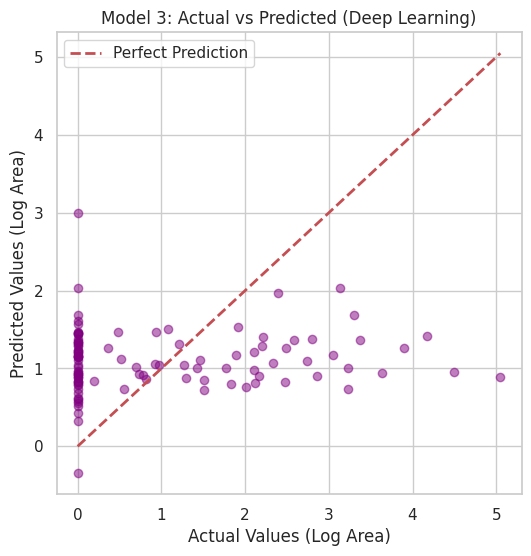


5 Contoh Prediksi Teratas
   Actual (Log)  Predicted (Log)     Error
0      0.000000         0.892554  0.892554
1      0.000000         0.798860  0.798860
2      0.000000         1.293431  1.293431
3      0.940007         1.471695  0.531688
4      0.000000         0.971406  0.971406


In [40]:
#@title Evaluasi Model Deep Learning
from tensorflow.keras.models import load_model

# Load Model yang sudah disimpan
try:
    model_dl = load_model('/content/model_mlp.h5')
    print("Berhasil memuat model dari '/content/model_mlp.h5'")
except:
    model_dl = load_model('/content/model_dl.keras')
    print("Berhasil memuat model dari '/content/model_dl.keras'")

# Lakukan Prediksi pada X_test
y_pred_dl = model_dl.predict(X_test)

# Hitung Metrik
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
mae_dl = mean_absolute_error(y_test, y_pred_dl)

print("\nHasil Model 3 (Deep Learning)")
print(f"RMSE: {rmse_dl:.4f}")
print(f"MAE : {mae_dl:.4f}")

# Visualisasi (Actual vs Predicted)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_dl, alpha=0.5, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction')
plt.title('Model 3: Actual vs Predicted (Deep Learning)')
plt.xlabel('Actual Values (Log Area)')
plt.ylabel('Predicted Values (Log Area)')
plt.legend()
plt.grid(True)
plt.savefig('/content/result_model3.png')
plt.show()

# Tampilkan Contoh Prediksi (Untuk Laporan)
results_df = pd.DataFrame({
    'Actual (Log)': y_test.values.flatten(),
    'Predicted (Log)': y_pred_dl.flatten()
})
results_df['Error'] = abs(results_df['Actual (Log)'] - results_df['Predicted (Log)'])
print("\n5 Contoh Prediksi Teratas")
print(results_df.head())

# Perbandingan Model

Grafik Perbandingan disimpan: images/model_comparison.png


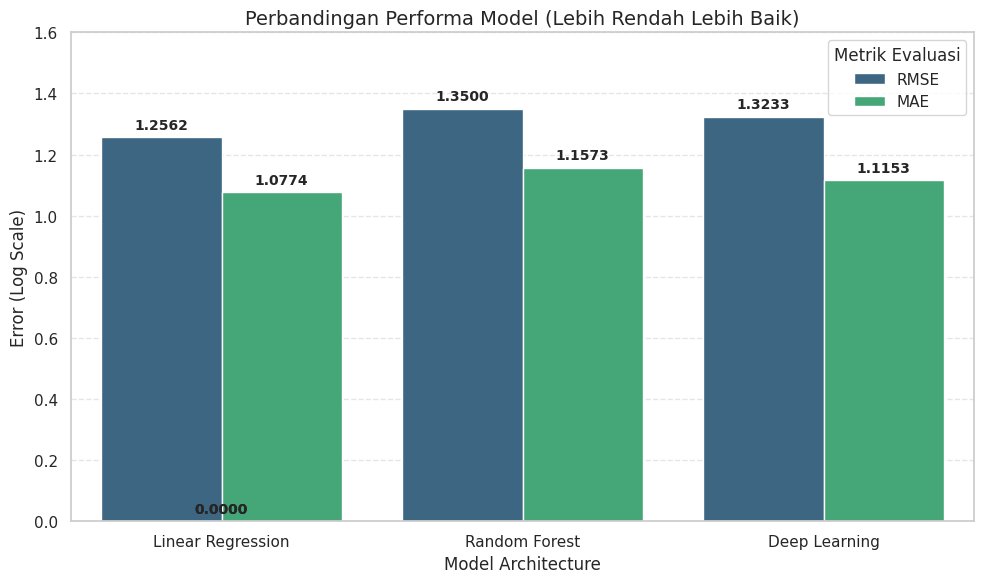

In [53]:
# Siapkan Data
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Deep Learning'],
    'RMSE': [1.2562, 1.3500, 1.3233],
    'MAE': [1.0774, 1.1573, 1.1153]
}

df_compare = pd.DataFrame(data)

# Reshape Data untuk Plotting (Melt)
df_melted = df_compare.melt(id_vars="Model", var_name="Metric", value_name="Error Value")

# Buat Bar Chart
plt.figure(figsize=(10, 6))
plot = sns.barplot(x="Model", y="Error Value", hue="Metric", data=df_melted, palette="viridis")

# Tambahkan angka di atas bar
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.4f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points',
                  fontsize=10, fontweight='bold')

plt.title('Perbandingan Performa Model (Lebih Rendah Lebih Baik)', fontsize=14)
plt.ylabel('Error (Log Scale)', fontsize=12)
plt.xlabel('Model Architecture', fontsize=12)
plt.ylim(0, 1.6) # Set batas y agar text tidak terpotong
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Metrik Evaluasi')

# Simpan
plt.tight_layout()
plt.savefig('/content/model_comparison.png')
print("Grafik Perbandingan disimpan: images/model_comparison.png")
plt.show()